In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
# import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/train.csv')
%matplotlib inline

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

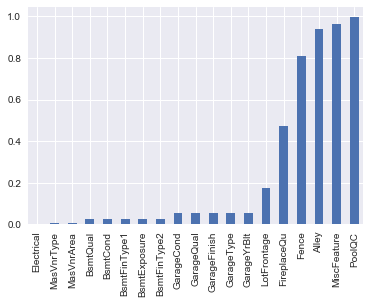

In [3]:
missing = train.isnull().sum()
missing_percent  = missing / train.shape[0]
missing_percent = missing_percent[missing_percent>0]
missing_percent.sort_values(inplace = True)
missing_percent.plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


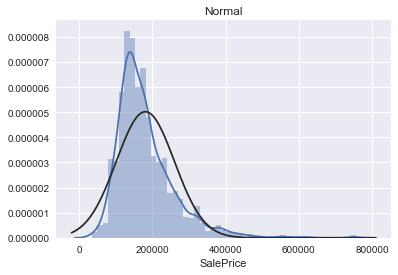

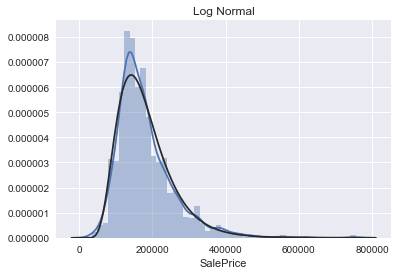

In [4]:
import scipy.stats as st
y = train['SalePrice']
# plt.figure(); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(); plt.title('Normal')
sns.distplot(y,  fit=st.norm)
plt.figure(); plt.title('Log Normal')
sns.distplot(y, fit=st.lognorm)


In [5]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


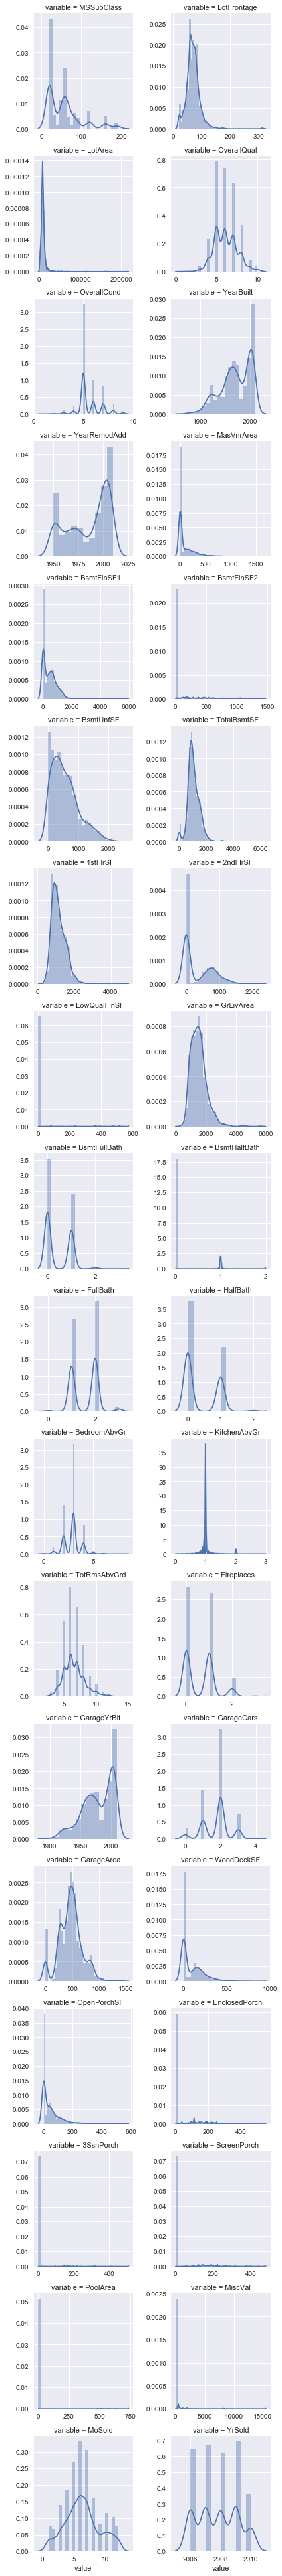

In [6]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [7]:
for col in qualitative: